In [6]:
import cv2
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import os

In [7]:
load_dotenv()

True

In [8]:
image_128_path = os.getenv("IMAGE_128_PATH")
image_256_path = os.getenv("IMAGE_256_PATH")

In [9]:
image_128_path

'D:/Urban Sound Classification/image_dataset/128'

In [10]:
image_256_path

'D:/Urban Sound Classification/image_dataset/256'

In [11]:
image_paths_128 = [os.path.join(image_128_path,path) for path in os.listdir(image_128_path)]
image_paths_256 = [os.path.join(image_256_path,path) for path in os.listdir(image_256_path)]

In [12]:
image_paths_128[0:5]

['D:/Urban Sound Classification/image_dataset/128\\air_conditioner_1169.png',
 'D:/Urban Sound Classification/image_dataset/128\\air_conditioner_1170.png',
 'D:/Urban Sound Classification/image_dataset/128\\air_conditioner_1326.png',
 'D:/Urban Sound Classification/image_dataset/128\\air_conditioner_1327.png',
 'D:/Urban Sound Classification/image_dataset/128\\air_conditioner_1328.png']

In [13]:
image_paths_256[0:5]

['D:/Urban Sound Classification/image_dataset/256\\air_conditioner_1169.png',
 'D:/Urban Sound Classification/image_dataset/256\\air_conditioner_1170.png',
 'D:/Urban Sound Classification/image_dataset/256\\air_conditioner_1326.png',
 'D:/Urban Sound Classification/image_dataset/256\\air_conditioner_1327.png',
 'D:/Urban Sound Classification/image_dataset/256\\air_conditioner_1328.png']

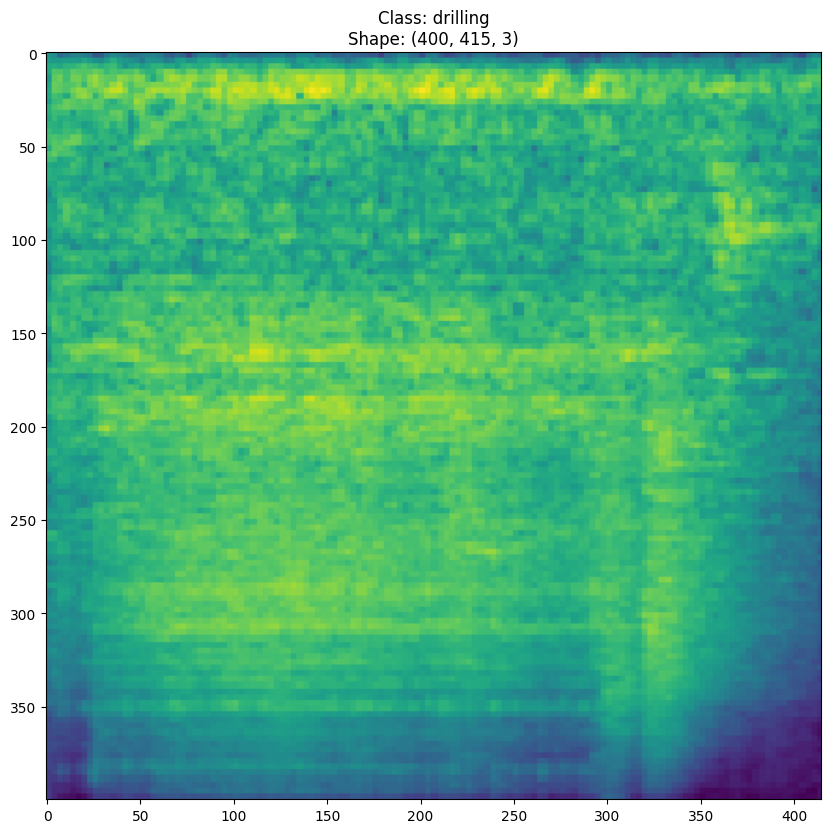

In [46]:
from matplotlib import pyplot as plt
### opencv ile notebookta görüntüleme
def return_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def visualize_random_image(image_paths):
    plt.figure(figsize=(10, 10))
    random_index = np.random.randint(0, len(image_paths))
    image_ex = return_image(image_paths[random_index])
    class_name = image_paths[random_index].split("\\")[-1].split("_")[0]
    plt.imshow(image_ex)
    plt.title(f"Class: {class_name}\nShape: {image_ex.shape}")
    plt.show()

visualize_random_image(image_paths_128)




In [49]:
import os
from collections import Counter


class_counts = Counter([fname.split('_')[0] for fname in os.listdir(image_128_path) if fname.endswith('.png')])
class_counts 

Counter({'air': 1000,
         'children': 1000,
         'dog': 1000,
         'drilling': 1000,
         'engine': 1000,
         'jackhammer': 1000,
         'street': 1000,
         'siren': 929,
         'car': 429,
         'gun': 374})

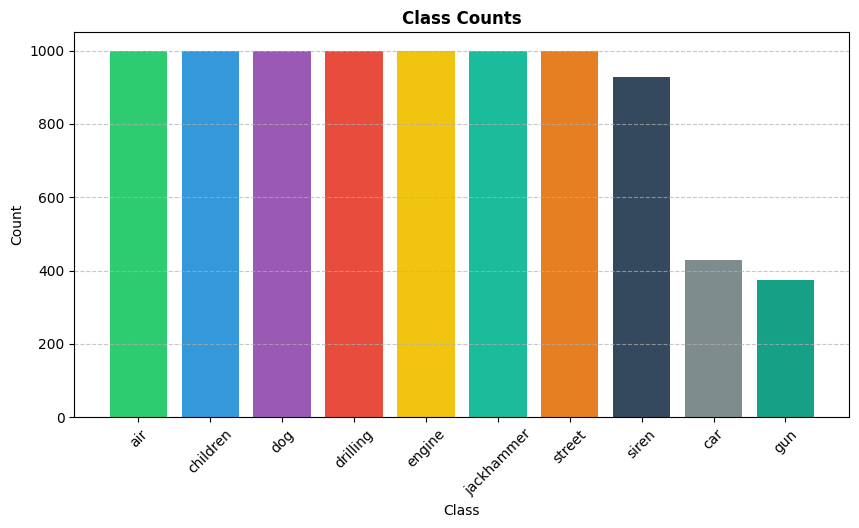

In [52]:
### visualize class counts
plt.figure(figsize=(10, 5))
class_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f1c40f', '#1abc9c', '#e67e22', '#34495e', '#7f8c8d', '#16a085']
plt.bar(class_counts.keys(), class_counts.values(), color=colors)
plt.title("Class Counts", fontsize=12, fontweight='bold')
plt.xlabel("Class", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [54]:
from tqdm import tqdm  
widths, heights = [], []
for fname in tqdm(os.listdir(image_128_path)):
    if fname.endswith('.png'):
        img = cv2.imread(os.path.join(image_128_path, fname))
        h, w = img.shape[:2]
        widths.append(w)
        heights.append(h)

print(f"Min: {np.min(widths)}, Max: {np.max(widths)}, Mean: {np.mean(widths)}")
print(f"Min: {np.min(heights)}, Max: {np.max(heights)}, Mean: {np.mean(heights)}")

100%|██████████| 8732/8732 [03:05<00:00, 47.00it/s] 

Min: 15, Max: 1200, Mean: 994.5500458085204
Min: 102, Max: 400, Mean: 388.8120705451214


In [55]:
print(f"Min Widths: {np.min(widths)}, Max Widths: {np.max(widths)}, Mean Widths: {np.mean(widths)}")
print(f"Min Heights: {np.min(heights)}, Max Heights: {np.max(heights)}, Mean Heights: {np.mean(heights)}")

Min Widths: 15, Max Widths: 1200, Mean Widths: 994.5500458085204
Min Heights: 102, Max Heights: 400, Mean Heights: 388.8120705451214


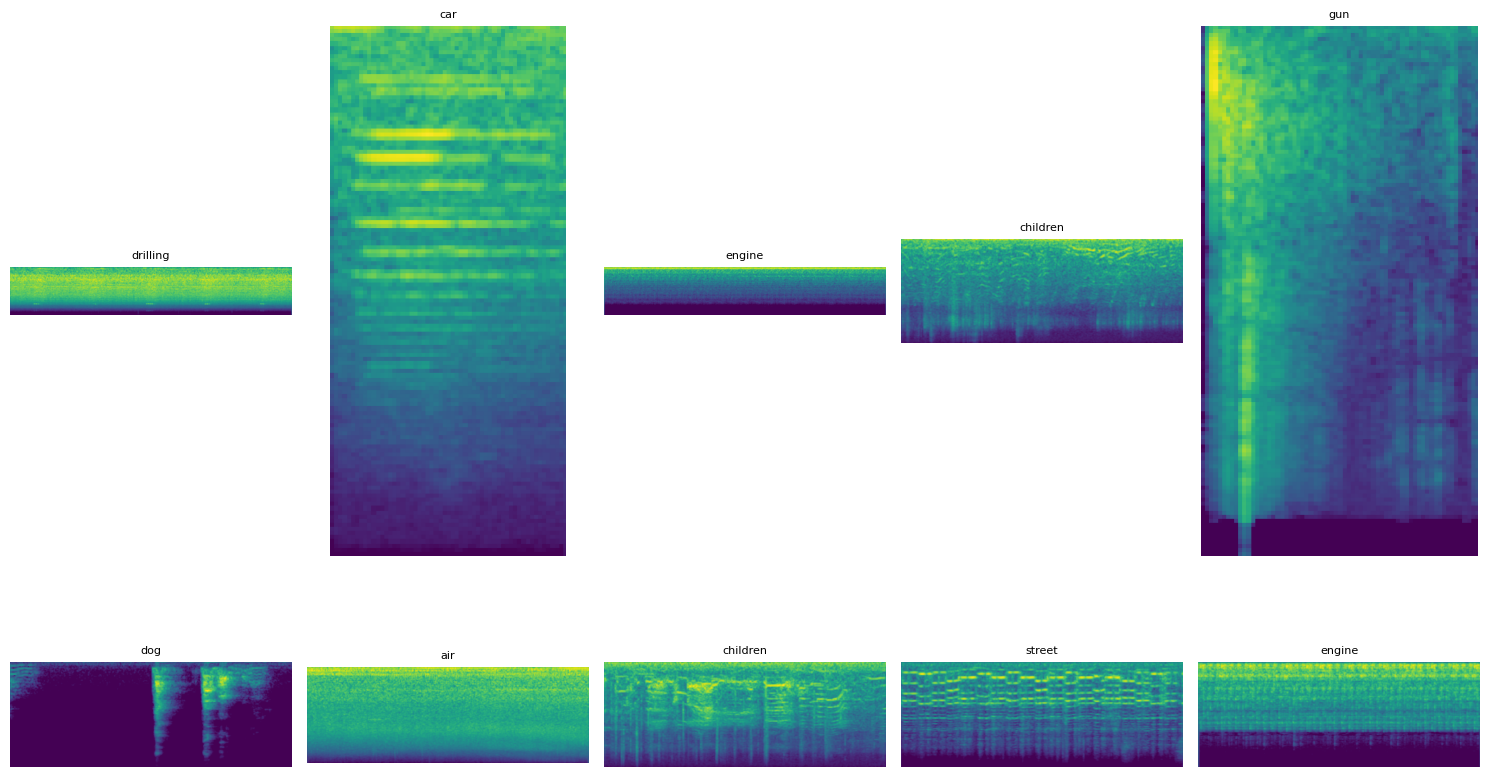

In [59]:
def visualize_random_samples(image_paths, num_samples=5, rows=2, cols=5, figsize=(15,10)):
    """
    Visualize random samples from a list of image paths in a grid layout.
    
    Args:
        image_paths (list): List of paths to image files
        num_samples (int): Number of samples per row (default: 5)
        rows (int): Number of rows in the grid (default: 2) 
        cols (int): Number of columns in the grid (default: 5)
        figsize (tuple): Figure size in inches (default: (15,10))
    """
    plt.figure(figsize=figsize)
    
    for row in range(rows):
        for col in range(cols):
            # Calculate subplot position
            plot_idx = row * cols + col + 1
            
            # Get random image
            random_idx = np.random.randint(0, len(image_paths))
            img = return_image(image_paths[random_idx])
            
            # Display image
            plt.subplot(rows, cols, plot_idx)
            plt.imshow(img)
            plt.axis('off')  # Hide axes
            
            # Extract and display class name from filename
            class_name = os.path.basename(image_paths[random_idx]).split('_')[0]
            plt.title(class_name, fontsize=8)
    
    plt.tight_layout()
    plt.show()
visualize_random_samples(image_paths_128)

In [65]:
from tqdm import tqdm
def check_image_readability(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            print(f"Cannot read: {image_path}")
    except Exception as e:
        print(f"Hatalı dosya: {image_path}")


for fname in tqdm(os.listdir(image_128_path)):
    check_image_readability(os.path.join(image_128_path, fname))

100%|██████████| 8732/8732 [00:38<00:00, 229.58it/s]


### Histogram of Grafiends 

100%|██████████| 8732/8732 [12:23<00:00, 11.75it/s]


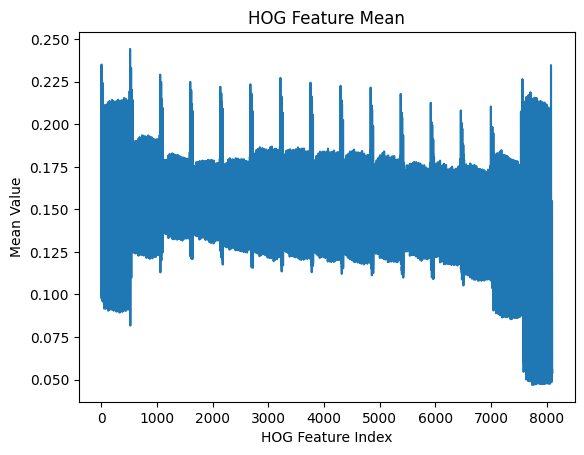

In [69]:
from skimage.feature import hog
import cv2
from tqdm import tqdm

hog_features = []
for fname in tqdm(os.listdir(image_128_path)):
    if fname.endswith('.png'):
        img = cv2.imread(os.path.join(image_128_path, fname), 0)  # grayscale
        img = cv2.resize(img, (128, 128))  # Boyut sabitlemek önemli!
        feat, _ = hog(img, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), block_norm='L2-Hys',
                      visualize=True, feature_vector=True)
        hog_features.append(feat)

hog_features = np.array(hog_features)

# HOG feature'larının ortalama ve dağılımı
hog_mean = hog_features.mean(axis=0)
plt.plot(hog_mean)
plt.title('HOG Feature Mean')
plt.xlabel('HOG Feature Index')
plt.ylabel('Mean Value')
plt.show()


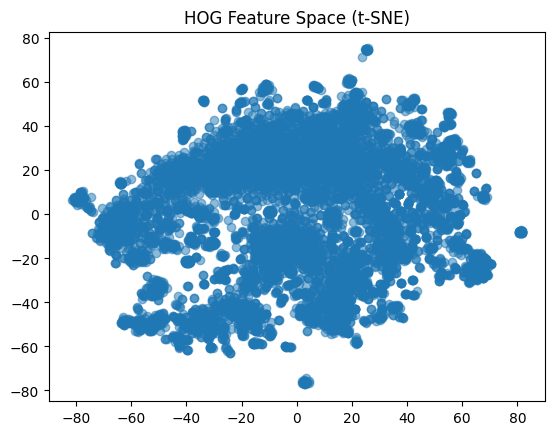

In [81]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
hog_tsne = tsne.fit_transform(hog_features)

plt.scatter(hog_tsne[:,0], hog_tsne[:,1], alpha=0.5)
plt.title('HOG Feature Space (t-SNE)')
plt.show()

In [86]:
from skimage.feature import graycomatrix, graycoprops
import cv2
import numpy as np
import os
from tqdm import tqdm

img_dir = image_128_path
texture_features = []

for fname in tqdm(os.listdir(img_dir)):
    if fname.endswith('.png'):
        img = cv2.imread(os.path.join(img_dir, fname), 0)
        img = cv2.resize(img, (128, 128))  # Standart boyut
        # GLCM: mesafe 1, açı 0 derece (yatay)
        glcm = graycomatrix(img, [1], [0], 256, symmetric=True, normed=True)
        # Haralick öznitelikleri
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
        energy = graycoprops(glcm, 'energy')[0, 0]
        correlation = graycoprops(glcm, 'correlation')[0, 0]
        texture_features.append([contrast, homogeneity, energy, correlation])

texture_features = np.array(texture_features)  # Shape: (n_image, 4)

100%|██████████| 8732/8732 [00:51<00:00, 169.71it/s]


In [87]:
texture_features

array([[7.61267224e+01, 2.51037532e-01, 5.95246162e-02, 9.74768565e-01],
       [7.10299582e+01, 2.62495599e-01, 7.38224091e-02, 9.76362181e-01],
       [8.89592151e+01, 2.63035478e-01, 8.21989782e-02, 9.70567054e-01],
       ...,
       [1.15313730e+02, 1.40826830e-01, 2.05624612e-02, 9.39859976e-01],
       [1.06729208e+02, 1.56207831e-01, 2.18857349e-02, 9.46145567e-01],
       [1.07343258e+02, 1.54270032e-01, 2.17898210e-02, 9.41582528e-01]])